Populating the interactive namespace from numpy and matplotlib


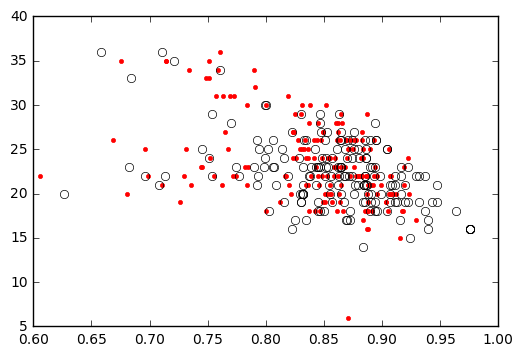

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from skimage.measure import regionprops
from skimage.morphology import label
from skimage.filters import threshold_otsu

import cv2

%pylab inline 
#sem o anaconda, tirar esta linha

#carrega a base de dados
digitsdb = datasets.load_digits()

#armazena as imagens e os rótulos em estruturas distintas
digits = np.array(digitsdb.images, 'int16')
targets = np.array(digitsdb.target)


#inicializa vetores que irão armazenar os descritores
d0 = []
d1 = []

#para cada imagem, extrai descritores
for image in digits:
    
    #forma de binarização 1
    thresh = threshold_otsu(image)
    binary = image > thresh
    #forma de binarização 2
    #binary = image != 0  ## << Tire este comentário para fazer o exercício!
    
    label_img = label(binary)
    
    #se quiser ver as figuras
    #plt.figure(1, figsize=(3, 3))
    #plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.show()
        
    regions = regionprops(label_img)
        
    for props in regions:
        d0.append(props.eccentricity)
        d1.append(props.filled_area)

d0 = np.array(d0)
d1 = np.array(d1)

#comparando os resultados para as classes 0 e 1 
idxA = targets==0 ## << Teste outros valores para o exercício!!!
idxB = targets==1
auxA = np.array(np.where(idxA == True))
auxB = np.array(np.where(idxB == True))
plt.figure()
plt.plot(d0[auxA], d1[auxA], 'r.')
plt.plot(d0[auxB], d1[auxB], 'ko',  markerfacecolor="None", markeredgecolor='black')
#plt.plot(d0, d1, 'k+') #se quiser plotar tudo!
plt.show()